In [4]:
%matplotlib inline
import numpy 
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [20]:
def rho_green_light(nx, rho_max, rho_light):
    """ COmputer 'green light' initial condition with shock and linear distribution
        
        Parameters:
        nx (int)- Number of grid points
        rho_max (float) - maximum car density
        rho_light (float) - density of cars at stoplight
        
        Returns:
        rho (array of floats) - array with initial values of density
    """
    rho = numpy.arange(nx)*2/nx*rho_light #before stoplight
    rho[(nx-1)/2:] = 0
    
    return rho

In [24]:
#Parameters and initial conditions
nx = 81
nt = 30
T= 4.
dx = T/(nx-1)

x = numpy.linspace(0,T,nx)

rho_max = 10.
u_max = 1.
rho_light = 10.

rho = rho_green_light(nx, rho_max, rho_light)

/home/randy/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


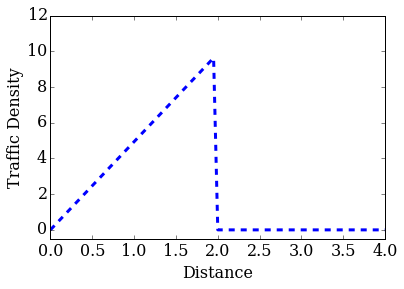

In [25]:
pyplot.plot(x, rho, ls='--', lw = 3)
pyplot.ylabel('Traffic Density')
pyplot.xlabel('Distance')
pyplot.ylim(-0.5, 12.);


In [26]:
def computeF(u_max, rho__max, rho):
    """Computes flux F = V*rho
    
    Parameters:
    u_max (float) - Maximum allowed velocity
    rho (array of float) - array with density of cars at each x
    rho_max (float) - maximum car density
    
    Returns:
    F (array) - Array of Flux at each x. 
    """
    return u_max*rho*(1-rho/rho_max)
    

In [32]:
def ftbs(rho, nt, dt, dx, rho_max, u_max):
    """Forward time, backward space discretized solution for traffic problem
    Parameters:
        rho (array of float) - density at current time step
        nt (int) - number of time steps
        dt (float) - time step size
        dx (float) - space step size
        rho_max(float) - max car density
        u_max (float) - max velocity
        
    Returns:
        rho_n (array of float) - density after nt steps at each x.
    """
    
    #initialiaze results
    rho_n = numpy.zeros((nt, len(rho)))
    rho_n[0,:] = rho.copy()
    
    for t in range(1, nt):
        F = computeF(u_max, rho_max, rho)
        rho_n[t, 1:] = rho[1:] - dt/dx*(F[1:] - F[:-1])
        rho_n[t, 0] = rho[0] #boundary conditions
        rho_n[t, -1] = rho[-1]
        rho = rho_n[t].copy()
        
    return rho_n

In [33]:
sigma = 1.
dt = sigma*dx

rho_n = ftbs(rho, nt, dt, dx, rho_max, u_max)

In [34]:
from matplotlib import animation
from JSAnimation.IPython_display import display_animation


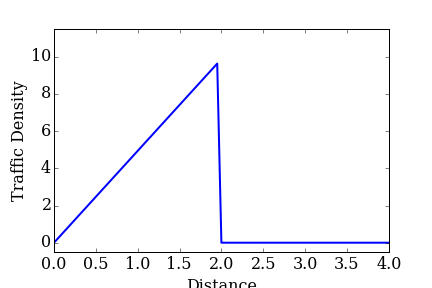
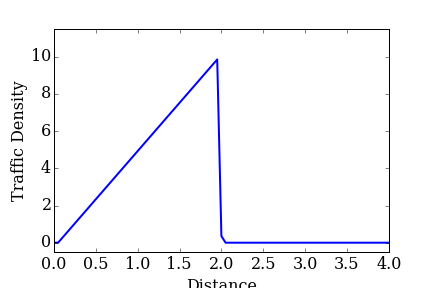
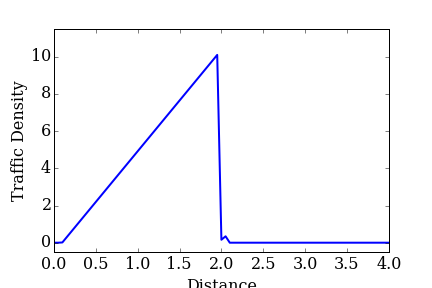
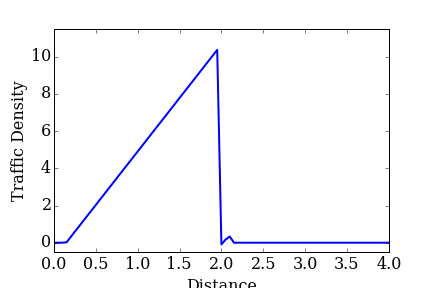
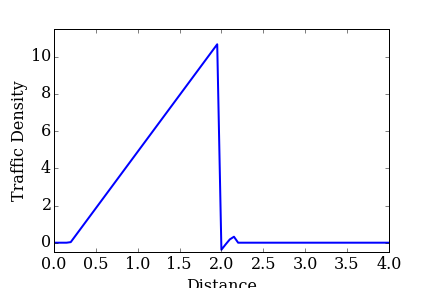
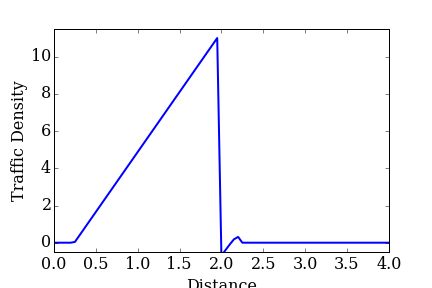
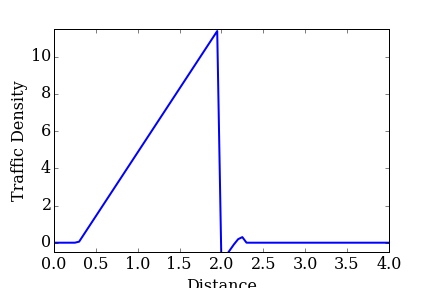
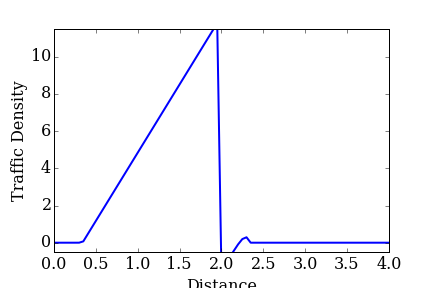
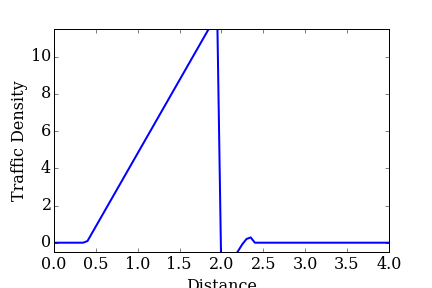
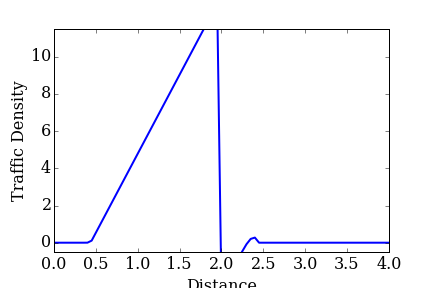
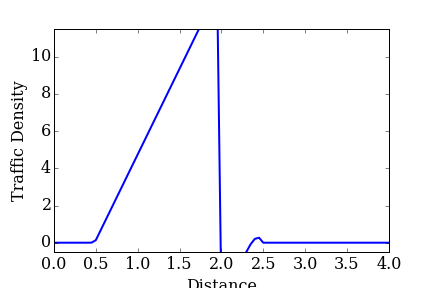
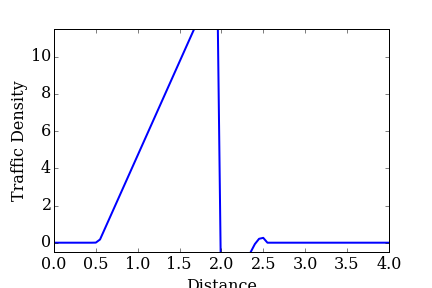
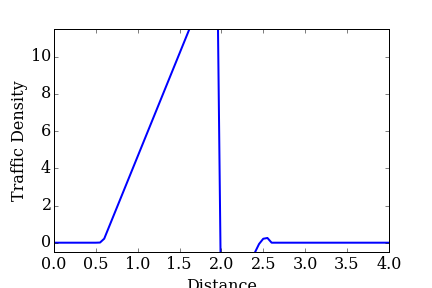
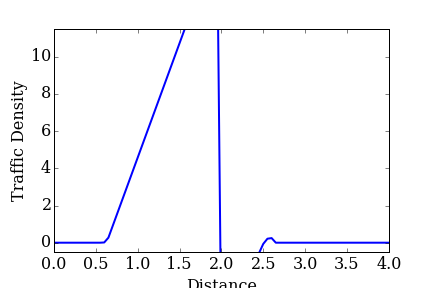
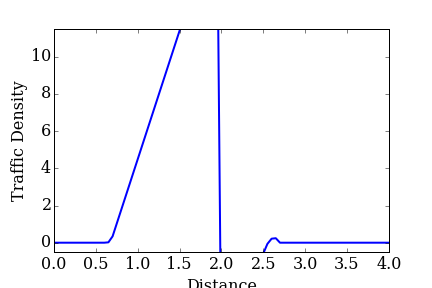
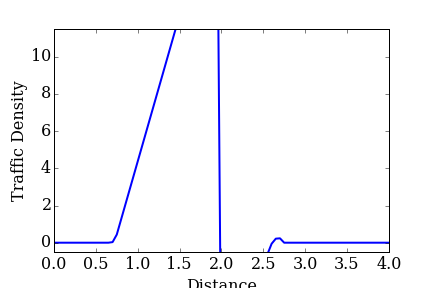
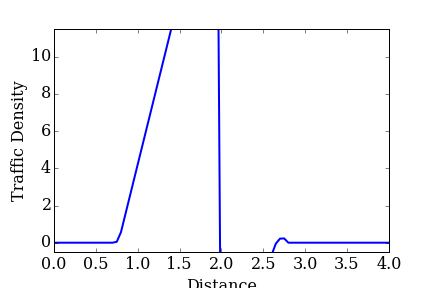
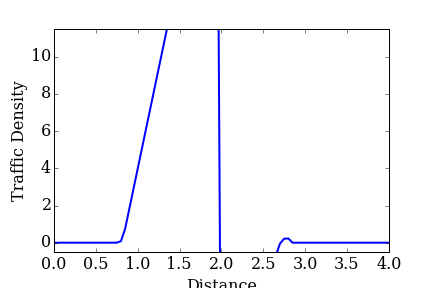
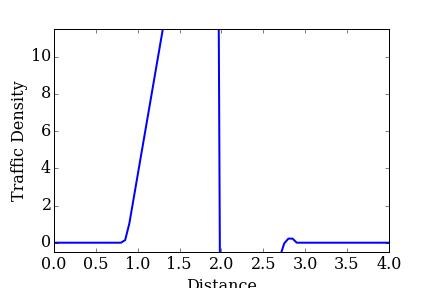
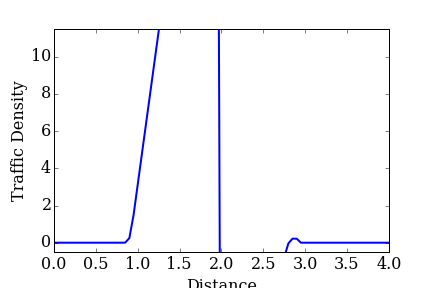
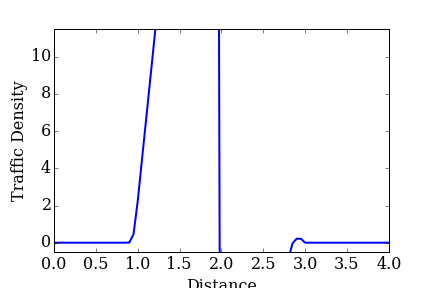
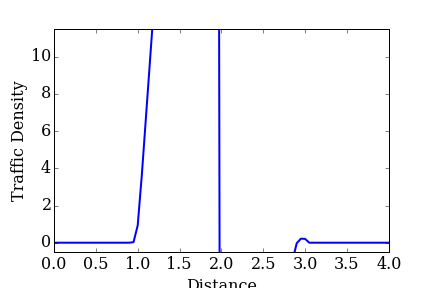
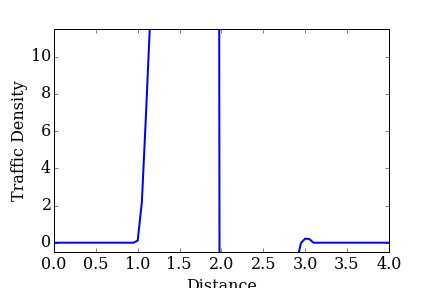
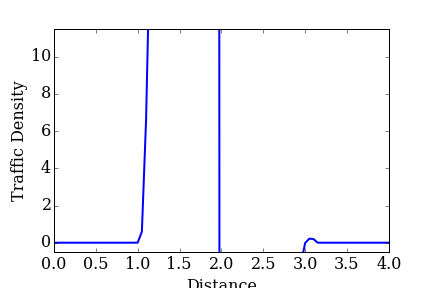
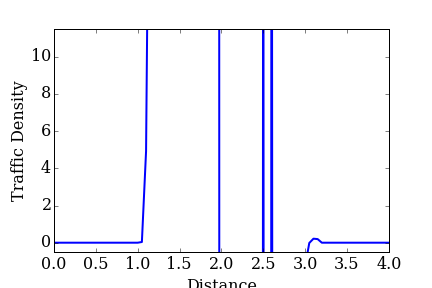
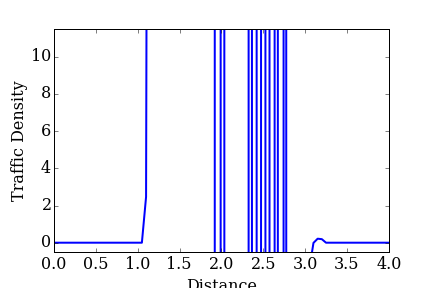
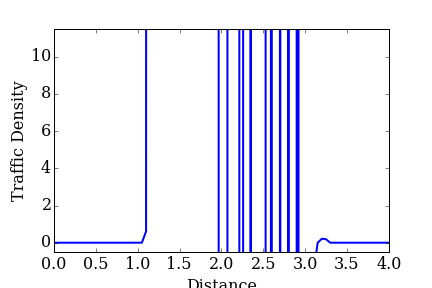
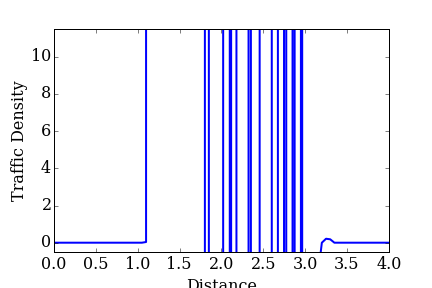
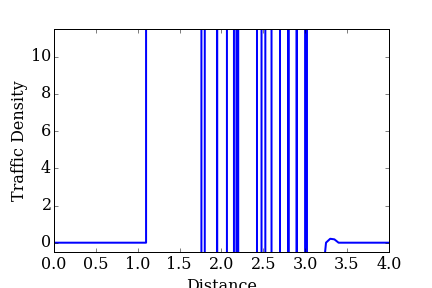
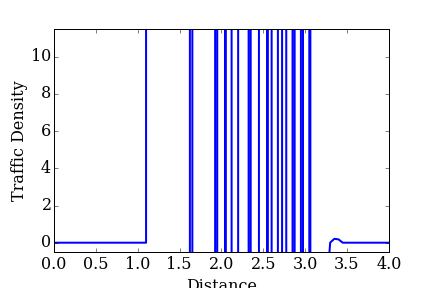

In [35]:
fig = pyplot.figure();
ax = pyplot.axes(xlim=(0,4), ylim = (-.5, 11.5), xlabel=('Distance'), ylabel=('Traffic Density'));
line, = ax.plot([], [], lw = 2);

def animate(data):
    x = numpy.linspace(0,4,nx)
    y = data
    line.set_data(x,y)
    return line,
anim = animation.FuncAnimation(fig, animate, frames=rho_n, interval=50)
display_animation(anim, default_mode='once')

/home/randy/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future



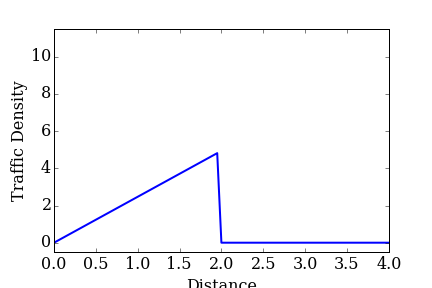
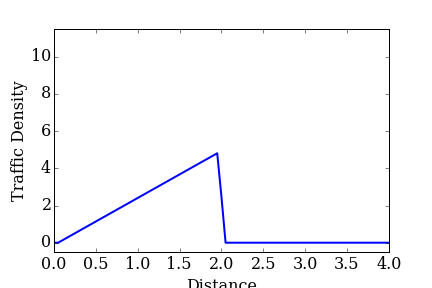
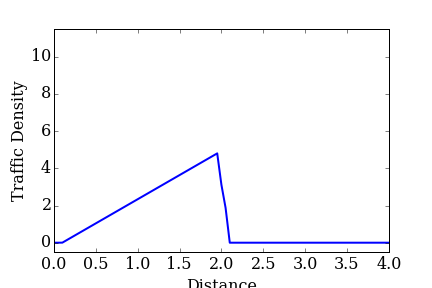
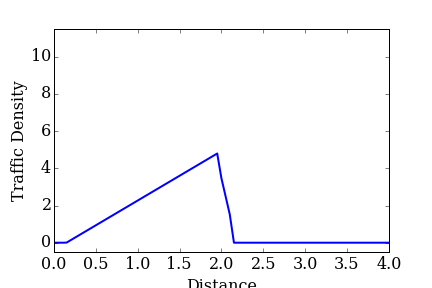
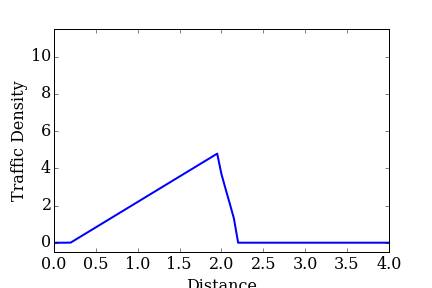
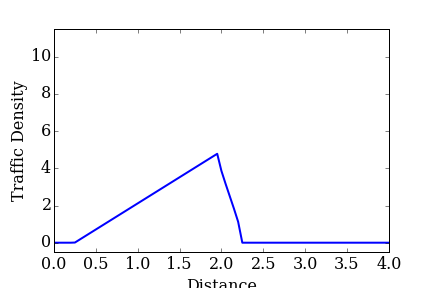
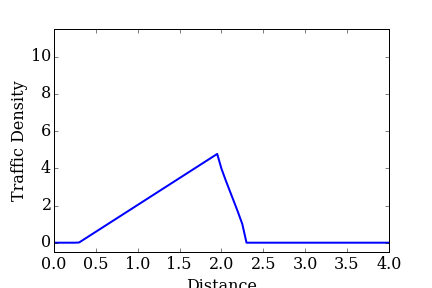
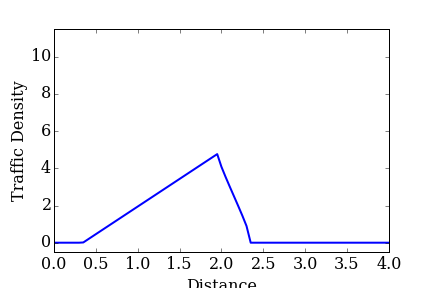
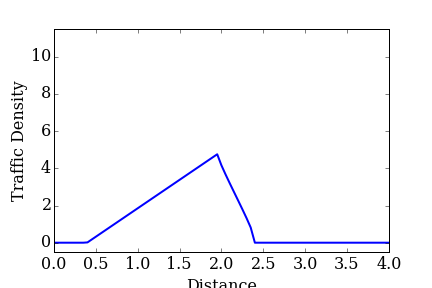
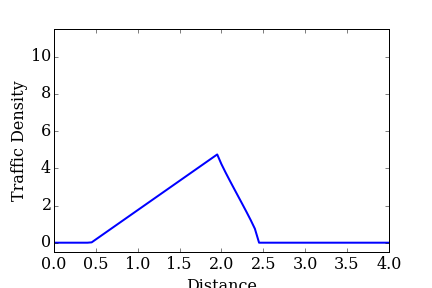
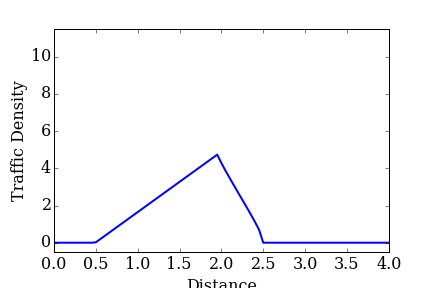
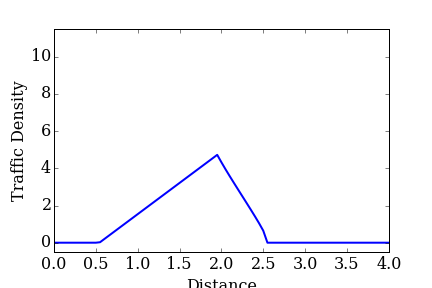
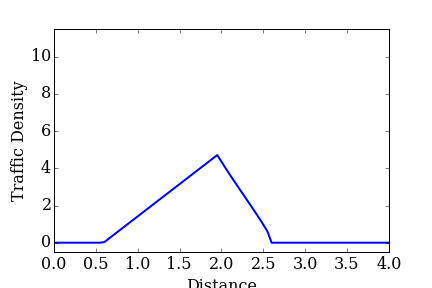
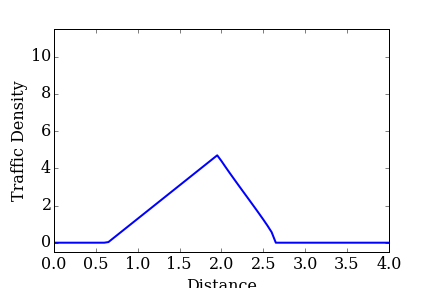
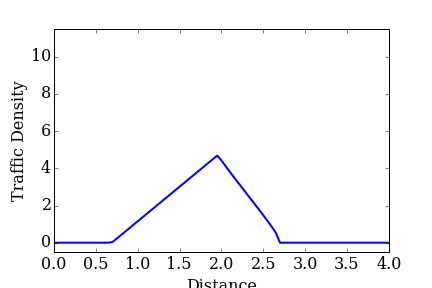
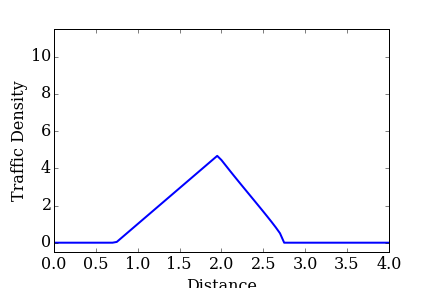
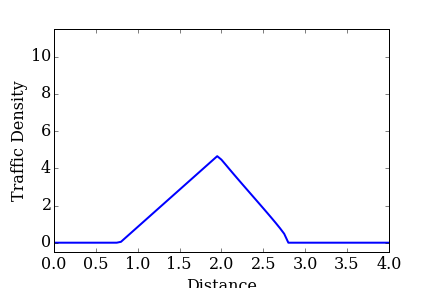
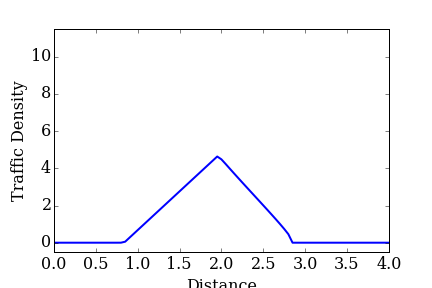
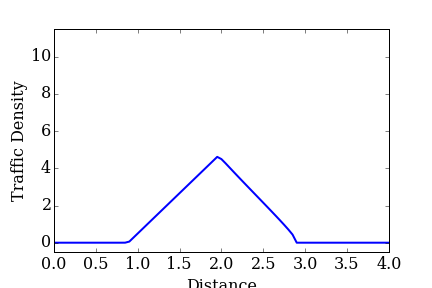
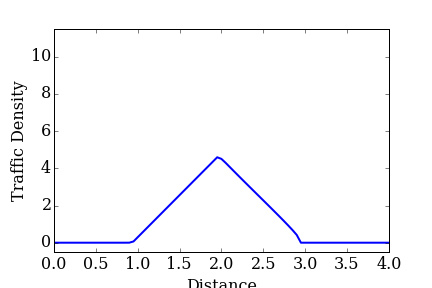
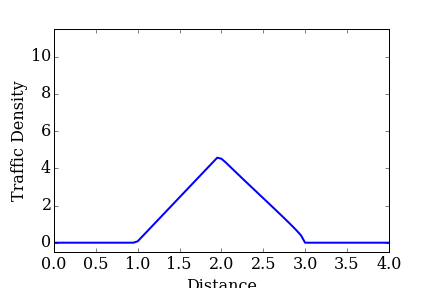
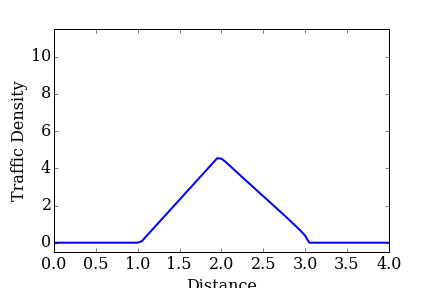
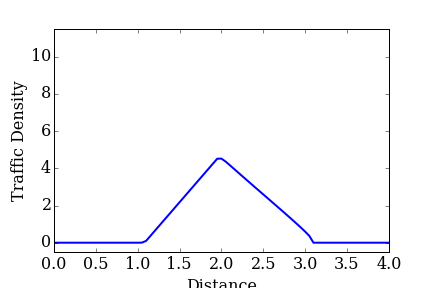
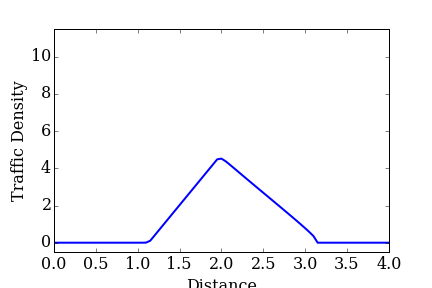
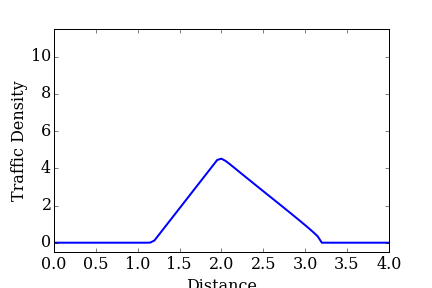
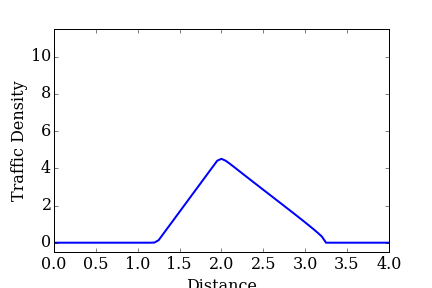
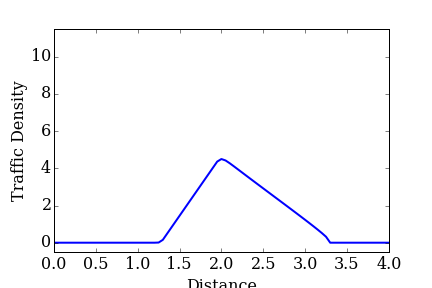
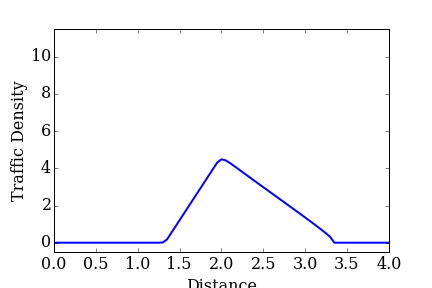
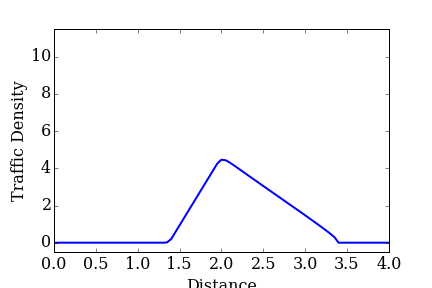
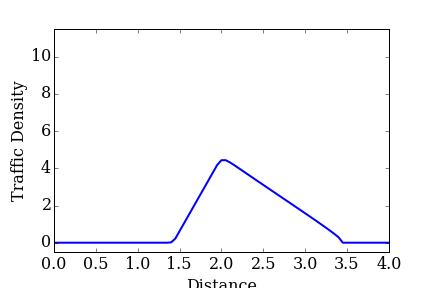
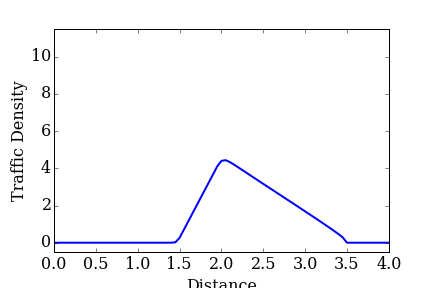
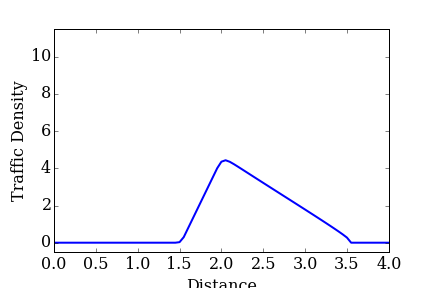
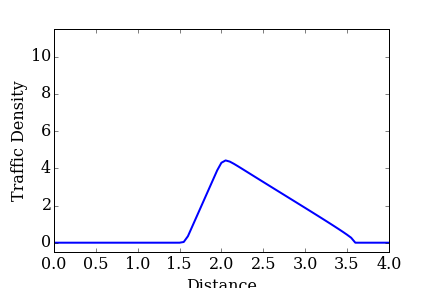
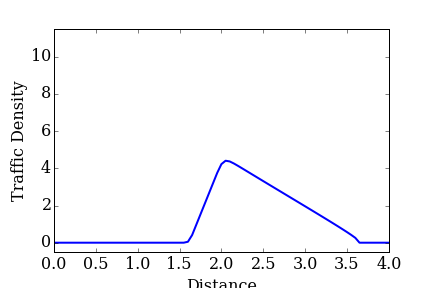
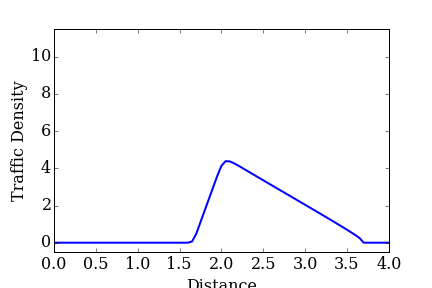
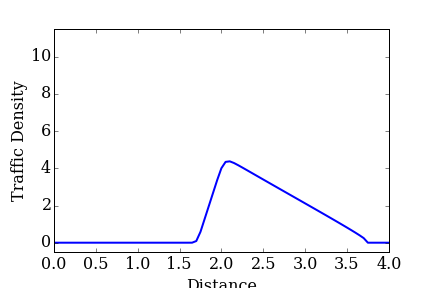
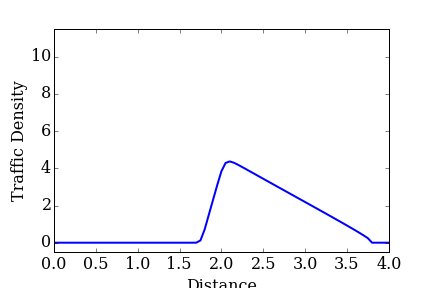
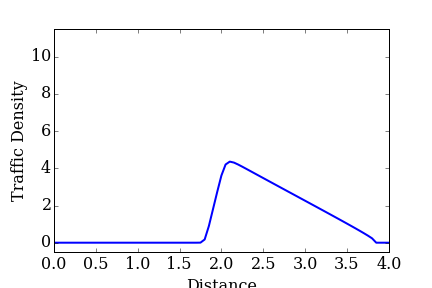
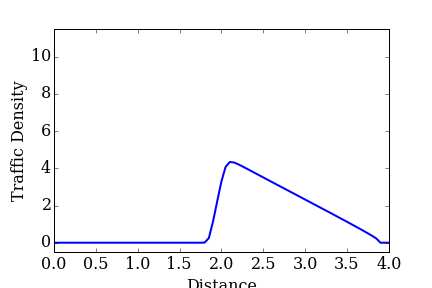
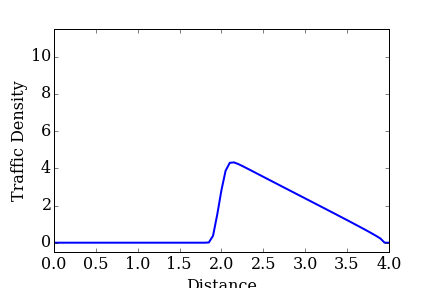

In [42]:
rho_light = 5
nt = 40
rho = rho_green_light(nx, rho_max, rho_light)
rho_n = ftbs(rho, nt, dt, dx, rho_max, u_max)

anim = animation.FuncAnimation(fig, animate, frames=rho_n, interval=50)
display_animation(anim, default_mode='once')

/home/randy/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future



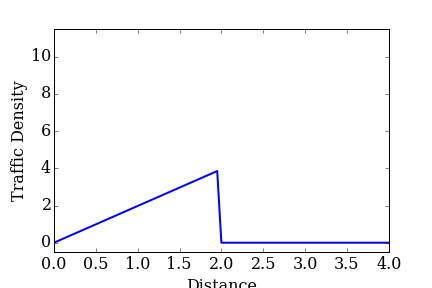
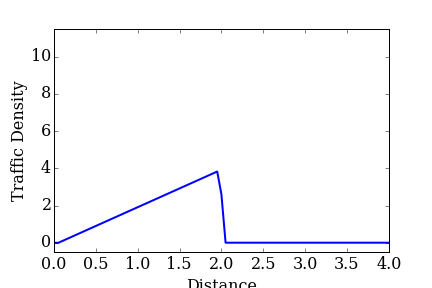
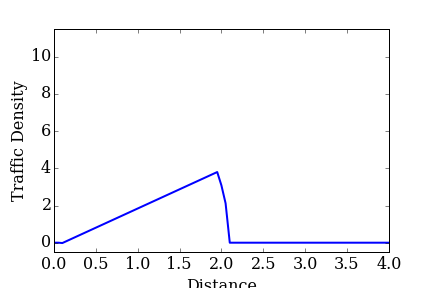
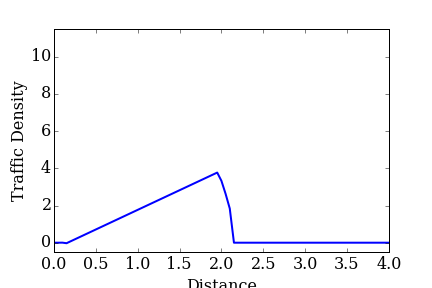
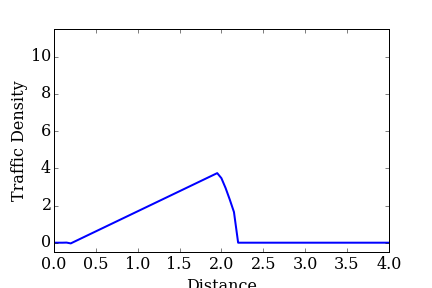
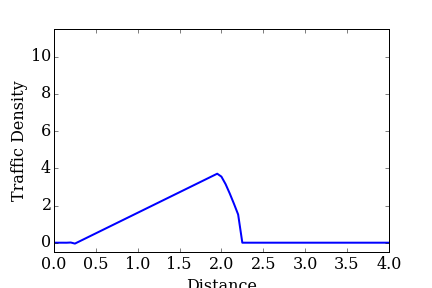
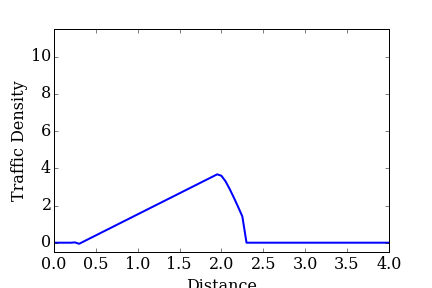
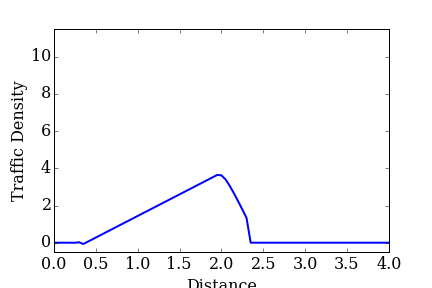
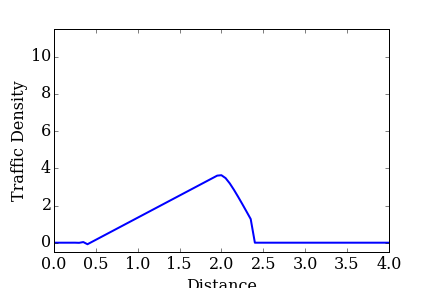
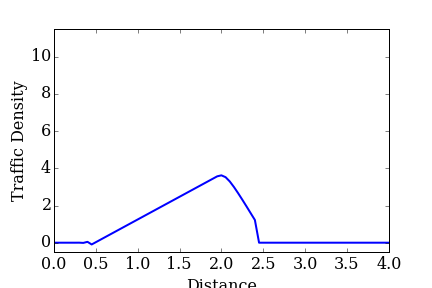
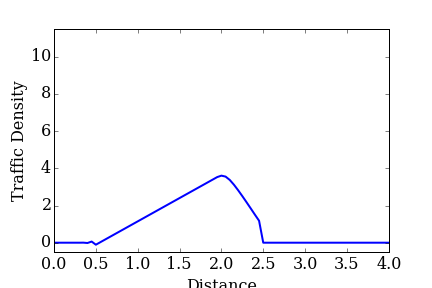
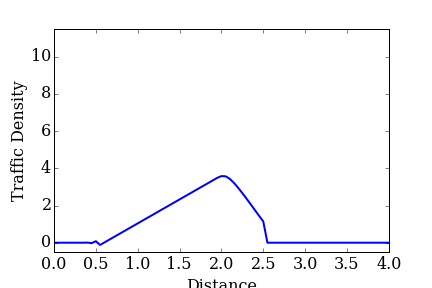
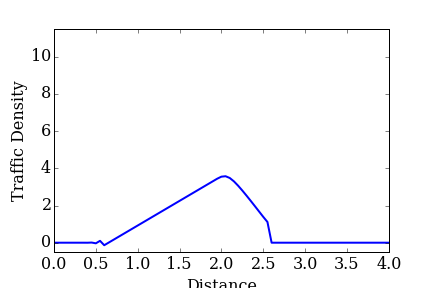
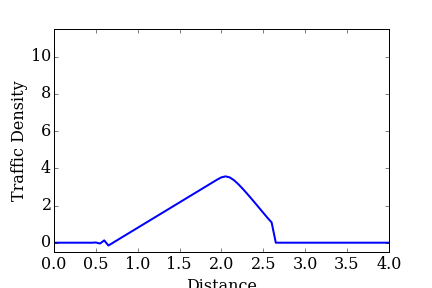
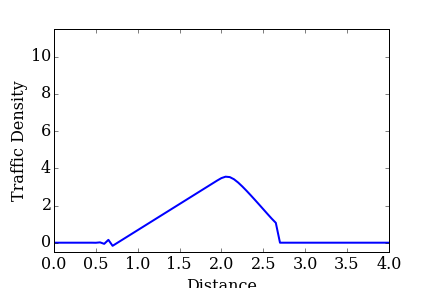
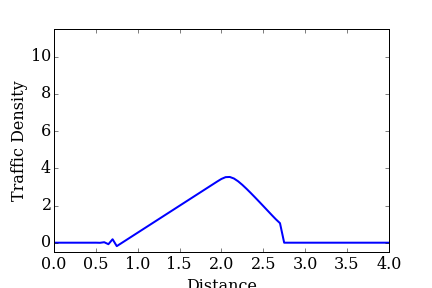
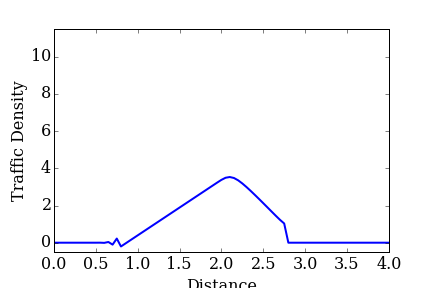
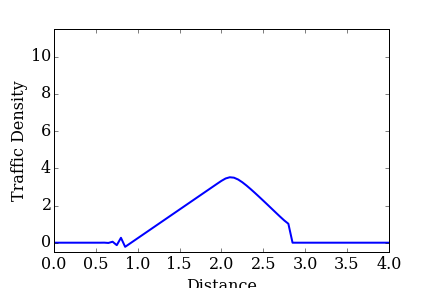
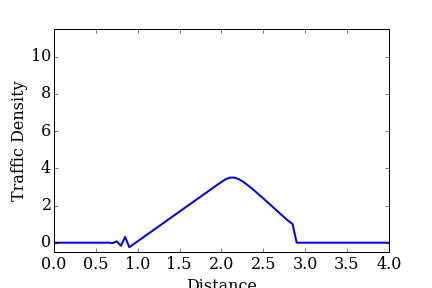
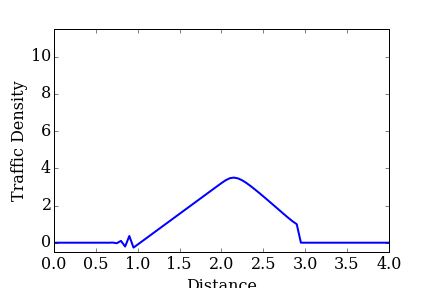
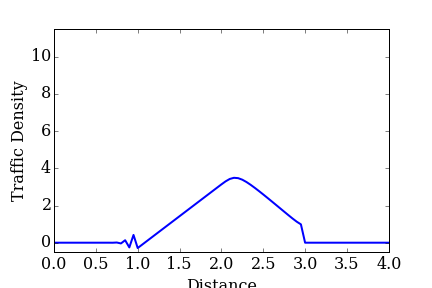
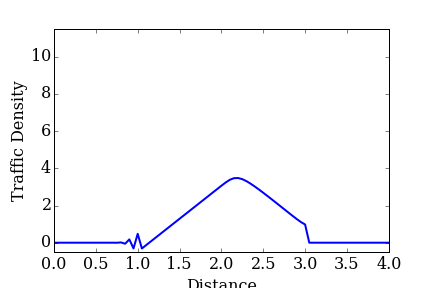
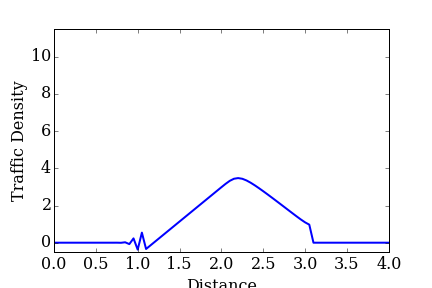
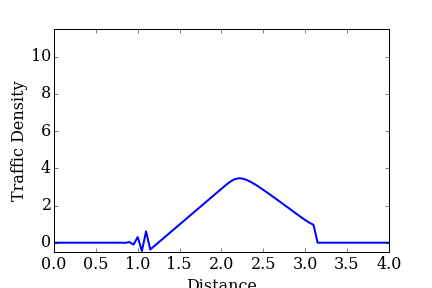
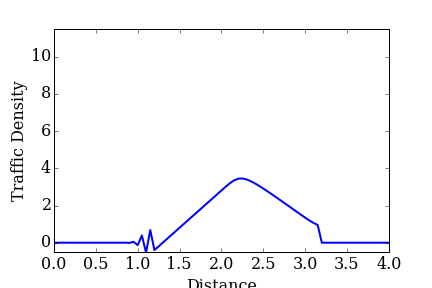
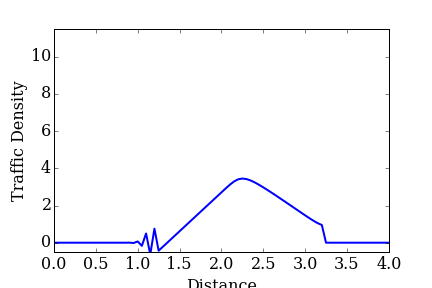
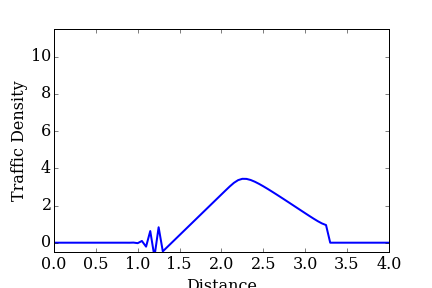
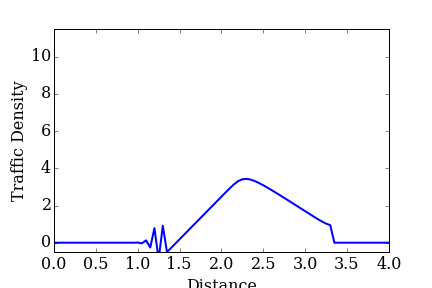
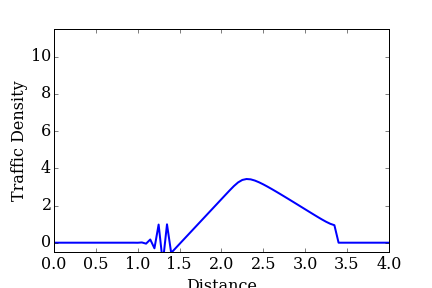
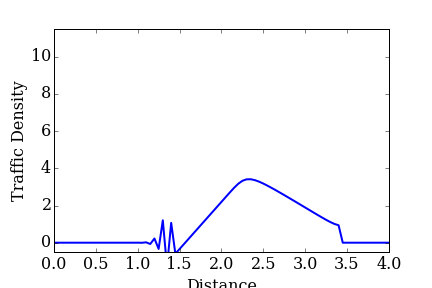
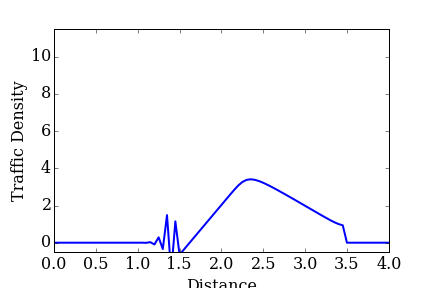
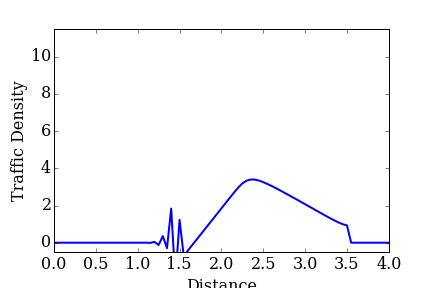
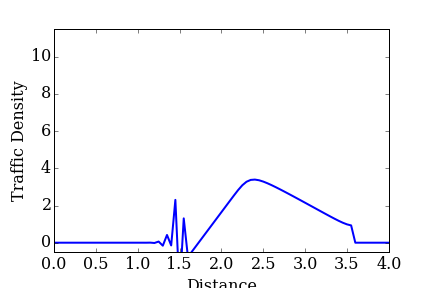
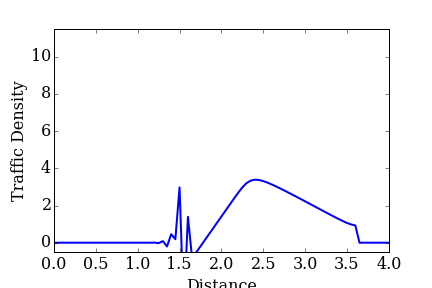
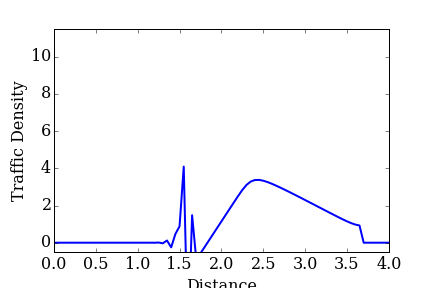
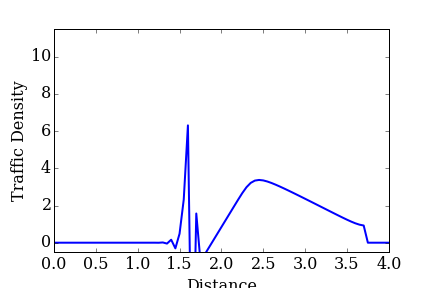
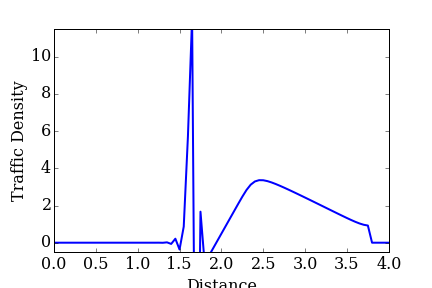
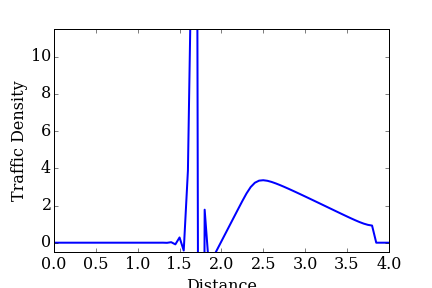
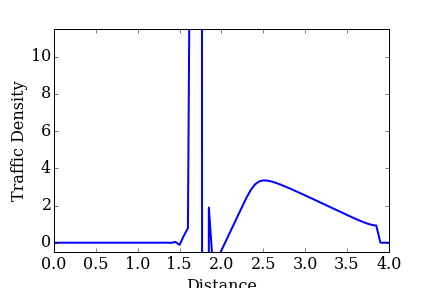
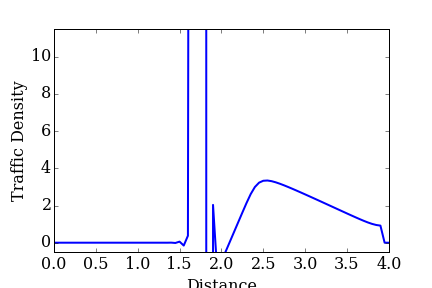

In [44]:
rho_light = 4
u_max = 1.1
nt = 40
rho = rho_green_light(nx, rho_max, rho_light)
rho_n = ftbs(rho, nt, dt, dx, rho_max, u_max)

anim = animation.FuncAnimation(fig,animate, frames=rho_n, interval=50)
display_animation(anim, default_mode='once')